## Decision Trees and Random Forests

### Data Loading

In [1]:
!git clone https://github.com/icomse/9th_workshop_ml_for_molecules.git
import os
os.chdir('9th_workshop_ml_for_molecules/Monday/Decision_Tree_Random_Forests')

Cloning into '9th_workshop_ml_for_molecules'...
remote: Enumerating objects: 121, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 121 (delta 46), reused 35 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (121/121), 15.93 MiB | 8.21 MiB/s, done.
Resolving deltas: 100% (46/46), done.


In [2]:
# Now we use pandas library to create a dataframe.
import numpy as np
import pandas as pd

Read in the prepared data

In [3]:
df_featurized=pd.read_csv('featurized_mixture.csv')

In [4]:
df_featurized.head()

,HBA,HBD,EXP. Data,Status,HBA:HBD,HBA_smiles,HBD_smiles,HBA_MaxAbsEStateIndex,HBA_MinEStateIndex,HBA_qed,...,HBD_EState_VSA3,HBD_EState_VSA4,HBD_EState_VSA8,HBD_EState_VSA9,HBD_VSA_EState1,HBD_VSA_EState3,HBD_VSA_EState5,HBD_VSA_EState7,HBD_VSA_EState8,HBD_FractionCSP3
0,choline chloride,ethyleneglycol,56.30,Training,0.5,C[N+](C)(C)CCO.[Cl-],C(CO)O,8.38625,0.0,0.397593,...,0.0,0.0,0.0,10.213055,0.0,15.25,0.0,0.0,-0.25,1.0
1,choline chloride,ethyleneglycol,56.20,Training,0.5,C[N+](C)(C)CCO.[Cl-],C(CO)O,8.38625,0.0,0.397593,...,0.0,0.0,0.0,10.213055,0.0,15.25,0.0,0.0,-0.25,1.0
2,choline chloride,ethyleneglycol,55.95,Training,0.5,C[N+](C)(C)CCO.[Cl-],C(CO)O,8.38625,0.0,0.397593,...,0.0,0.0,0.0,10.213055,0.0,15.25,0.0,0.0,-0.25,1.0
3,choline chloride,ethyleneglycol,55.85,Training,0.5,C[N+](C)(C)CCO.[Cl-],C(CO)O,8.38625,0.0,0.397593,...,0.0,0.0,0.0,10.213055,0.0,15.25,0.0,0.0,-0.25,1.0
4,choline chloride,ethyleneglycol,55.75,Training,0.5,C[N+](C)(C)CCO.[Cl-],C(CO)O,8.38625,0.0,0.397593,...,0.0,0.0,0.0,10.213055,0.0,15.25,0.0,0.0,-0.25,1.0


In [5]:
df_featurized.describe()

,EXP. Data,HBA:HBD,HBA_MaxAbsEStateIndex,HBA_MinEStateIndex,HBA_qed,HBA_SPS,HBA_MaxPartialCharge,HBA_MinPartialCharge,HBA_Ipc,HBA_PEOE_VSA1,...,HBD_EState_VSA3,HBD_EState_VSA4,HBD_EState_VSA8,HBD_EState_VSA9,HBD_VSA_EState1,HBD_VSA_EState3,HBD_VSA_EState5,HBD_VSA_EState7,HBD_VSA_EState8,HBD_FractionCSP3
count,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,7.710000e+02,771.000000,...,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000
mean,45.759493,0.896778,6.289846,-0.272988,0.443053,10.672407,0.097435,-0.985626,2.362617e+04,20.116406,...,4.822854,2.132598,0.823147,12.406675,1.136692,17.151928,-0.281854,-0.153848,0.468913,0.916219
std,9.483999,2.053535,2.766988,0.601788,0.068198,0.442242,0.013999,0.093103,8.157183e+04,2.841001,...,7.648994,6.299215,2.316669,4.403541,2.955222,8.063385,0.773704,1.528376,1.038049,0.236557
min,31.100000,0.053000,2.274306,-1.775154,0.397593,4.500000,-0.010576,-1.000000,2.754888e+00,5.733667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.018889,-7.040694,-1.159491,0.000000
25%,38.250000,0.125000,2.409722,0.000000,0.397593,10.500000,0.101493,-1.000000,1.814171e+01,16.981451,...,0.000000,0.000000,0.000000,10.213055,0.000000,15.250000,0.000000,-0.953704,-0.250000,1.000000
50%,45.600000,0.250000,8.386250,0.000000,0.397593,10.500000,0.101493,-1.000000,1.814171e+01,21.996591,...,0.000000,0.000000,0.000000,10.213055,0.000000,16.469028,0.000000,0.000000,0.390000,1.000000
75%,49.600000,0.500000,8.386250,0.000000,0.478945,10.714286,0.101493,-1.000000,5.034904e+03,21.996591,...,6.544756,0.000000,0.000000,15.319582,0.000000,16.759259,0.000000,0.000000,1.605278,1.000000
max,75.000000,11.000000,8.386250,0.000000,0.637261,11.333333,0.116075,-0.330474,1.792570e+06,21.996591,...,26.427528,25.683286,11.467335,25.532637,32.111111,44.972431,0.000000,3.827500,3.092593,1.000000


Shuffle the data, as there is some correlation in the inputs.

In [8]:
df_featurized=df_featurized.sample(frac=1.0)

In [9]:
df_featurized.head()

,HBA,HBD,EXP. Data,Status,HBA:HBD,HBA_smiles,HBD_smiles,HBA_MaxAbsEStateIndex,HBA_MinEStateIndex,HBA_qed,...,HBD_EState_VSA3,HBD_EState_VSA4,HBD_EState_VSA8,HBD_EState_VSA9,HBD_VSA_EState1,HBD_VSA_EState3,HBD_VSA_EState5,HBD_VSA_EState7,HBD_VSA_EState8,HBD_FractionCSP3
176,choline chloride,glycerol,59.517,Training,0.500,C[N+](C)(C)CCO.[Cl-],C(C(CO)O)O,8.386250,0.000000,0.397593,...,0.000000,0.0,0.0,15.319582,0.0,24.016204,0.0,-0.953704,-0.729167,1.0
420,choline chloride,glycerol,62.000,Training,0.053,C[N+](C)(C)CCO.[Cl-],C(C(CO)O)O,8.386250,0.000000,0.397593,...,0.000000,0.0,0.0,15.319582,0.0,24.016204,0.0,-0.953704,-0.729167,1.0
521,choline chloride,monoethanolamine,48.500,Test,0.143,C[N+](C)(C)CCO.[Cl-],C(CO)N,8.386250,0.000000,0.397593,...,6.544756,0.0,0.0,10.840195,0.0,7.750000,0.0,0.000000,0.472222,1.0
584,choline chloride,glycerol,50.300,Test,0.333,C[N+](C)(C)CCO.[Cl-],C(C(CO)O)O,8.386250,0.000000,0.397593,...,0.000000,0.0,0.0,15.319582,0.0,24.016204,0.0,-0.953704,-0.729167,1.0
656,methyltriphenylphosphonium bromide,ethyleneglycol,46.570,Training,0.250,C[P+](C1=CC=CC=C1)(C2=CC=CC=C2)C3=CC=CC=C3.[Br-],C(CO)O,2.409722,-1.526435,0.603166,...,0.000000,0.0,0.0,10.213055,0.0,15.250000,0.0,0.000000,-0.250000,1.0


## Splitting

In [10]:
# Splitting into train and test sets according to the original dataset
y_train = df_featurized[df_featurized['Status'] =='Training']['EXP. Data']
x_train = df_featurized[df_featurized['Status'] =='Training'].drop(['EXP. Data', 'HBD','HBD_smiles', 'Status', 'HBA', 'HBA_smiles'], axis=1)
y_test = df_featurized[df_featurized['Status'] =='Test']['EXP. Data']
x_test = df_featurized[df_featurized['Status'] =='Test'].drop(['EXP. Data', 'HBD','HBD_smiles', 'Status', 'HBA', 'HBA_smiles'], axis=1)
print('train size: ',x_train.shape[0])
print('test size: ',x_test.shape[0])

train size:  615
test size:  156


### Decision Trees

In [11]:
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [12]:
dt_model = tree.DecisionTreeRegressor(max_depth=3)
dt_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [13]:
y_pred_train = dt_model.predict(x_train)
y_pred_test = dt_model.predict(x_test)
print("Train MSE=",mean_squared_error(y_pred_train,y_train))
print("Test MSE=",mean_squared_error(y_pred_test,y_test))

Train MSE= 16.563859566936554
Test MSE= 16.133819820020097


In [14]:
print(y_pred_test)

[47.27312292 55.93184906 55.93184906 47.27312292 47.27312292 47.27312292
 47.27312292 47.27312292 36.97734375 35.28968992 65.82671111 35.28968992
 35.28968992 47.27312292 47.27312292 47.27312292 47.27312292 47.27312292
 47.27312292 36.97734375 65.82671111 65.82671111 35.28968992 47.27312292
 65.82671111 55.93184906 35.28968992 46.71428571 47.27312292 35.28968992
 47.27312292 47.27312292 47.27312292 47.27312292 35.28968992 35.28968992
 47.27312292 36.97734375 47.27312292 36.97734375 47.27312292 36.97734375
 47.27312292 47.27312292 35.28968992 55.93184906 47.27312292 36.97734375
 47.27312292 65.82671111 44.69285714 35.28968992 35.28968992 47.27312292
 47.27312292 36.97734375 35.28968992 48.3        47.27312292 47.27312292
 47.27312292 35.28968992 44.69285714 47.27312292 65.82671111 65.82671111
 35.28968992 36.97734375 35.28968992 47.27312292 35.28968992 47.27312292
 65.82671111 35.28968992 47.27312292 47.27312292 47.27312292 47.27312292
 35.28968992 35.28968992 47.27312292 35.28968992 47

Let's look at the tree!

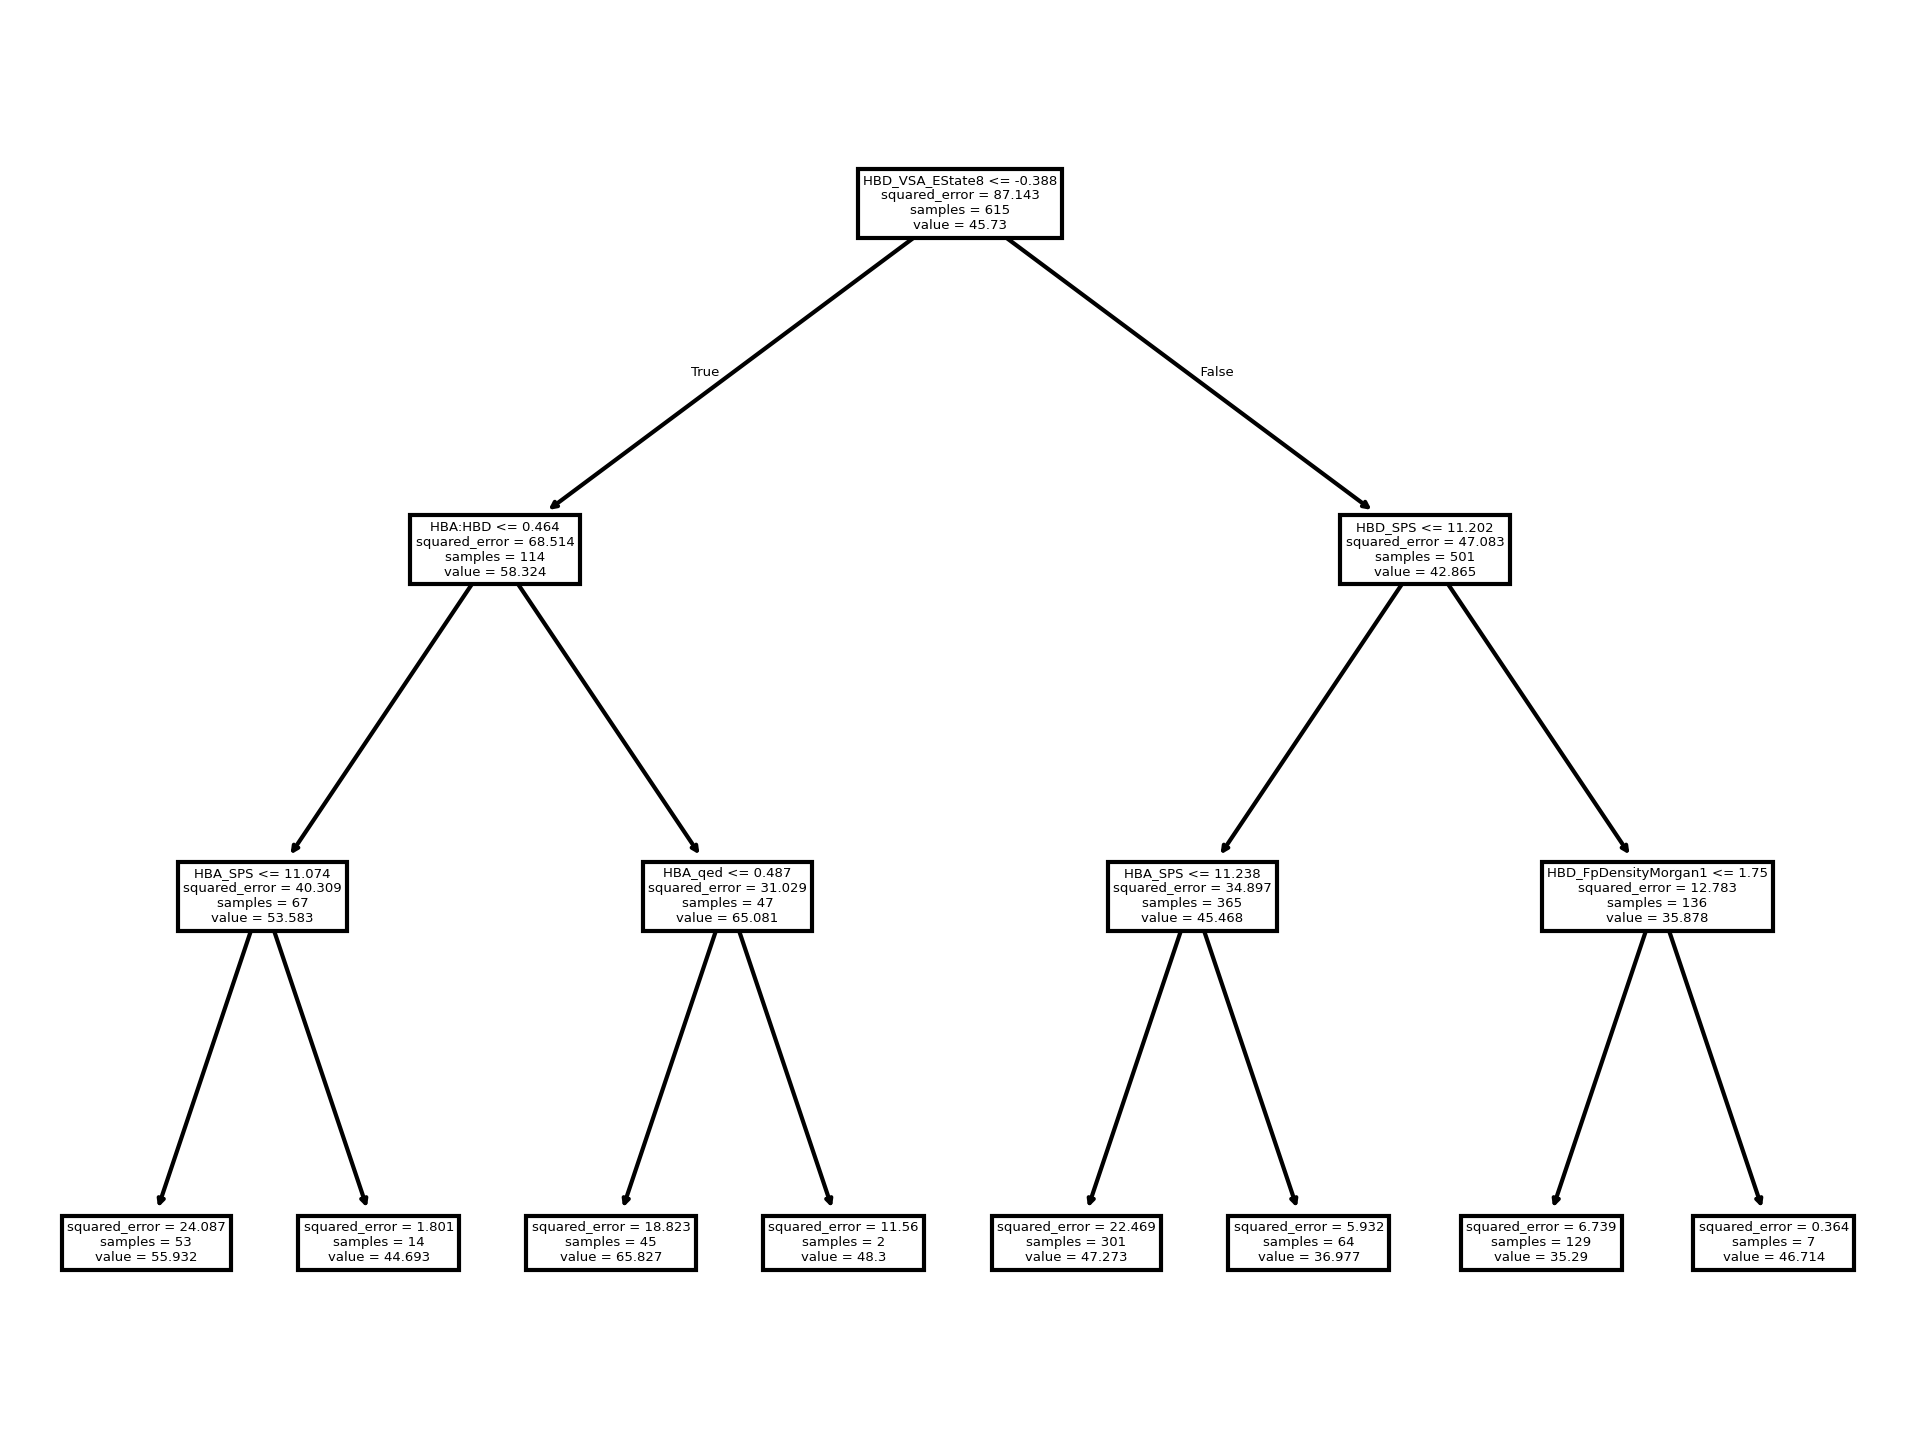

In [15]:
plt.figure(figsize=(8, 6), dpi=300)
tree.plot_tree(dt_model,feature_names=x_train.columns)
plt.show()

**Hacking**: look up some of the decision tree options, and see if you can do better!  Remember, you want to do better on the TEST MSE.

### Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
rf_model = RandomForestRegressor(max_depth=5,
                                 n_estimators=200,
                                 min_samples_split=3,
                                 min_samples_leaf=1)
rf_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_split=3, n_estimators=200)

In [18]:
y_pred_train = rf_model.predict(x_train)
y_pred_test = rf_model.predict(x_test)
print("Train MSE=",mean_squared_error(y_pred_train,y_train))
print("Test MSE=",mean_squared_error(y_pred_test,y_test))
print("Train MAE=",mean_absolute_error(y_pred_train,y_train))
print("Test MAE=",mean_absolute_error(y_pred_test,y_test))

Train MSE= 5.419722799317024
Test MSE= 5.740295906349782
Train MAE= 1.645322189946053
Test MAE= 1.7331396116594517


Are we going to try to visualize these!  NO!

**Hacking**: Look up some of the additional random forest options, and see if you can do better!

### Hyperparameter search

Let's try to automate the process above.  `scikit-learn` has code to do this!  It's called `GridSearchCV`, Grid, and it peforms cross-validation on a whole list of parameters.

In [ ]:
import sklearn

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Hyperparameter tuning and cross validation
param_grid = {
    'n_estimators': [50,100],  # Number of trees
    'max_depth': [5, 10, 20],      # Maximum depth of each tree
    'max_features': [1.0, 'sqrt', 'log2'],    # Number of features to consider at each split
    'min_samples_split': [2,3,4],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1,2,3]     # Minimum number of samples required at each leaf node
}
rf_model = RandomForestRegressor()  # model creation
grid_search = GridSearchCV(rf_model,
                           param_grid=param_grid,
                           cv=5,
                           verbose=3,
                           scoring='neg_mean_squared_error',
                           return_train_score=True) # will go through all possible combinations in the param grid
grid_search.fit(x_train,y_train) # fitting to train set

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV 1/5] END max_depth=5, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=-5.179, test=-6.217) total time=   0.1s
[CV 2/5] END max_depth=5, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=-5.373, test=-7.699) total time=   0.1s
[CV 3/5] END max_depth=5, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=-6.059, test=-6.544) total time=   0.1s
[CV 4/5] END max_depth=5, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=-5.031, test=-9.148) total time=   0.2s
[CV 5/5] END max_depth=5, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=-4.838, test=-7.132) total time=   0.1s
[CV 1/5] END max_depth=5, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-5.128, test=-5.988) total time=   0.3s


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 20],
                         'max_features': [1.0, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [20]:
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 50}


This can be pretty random!  Last time I ran this I got:
```
Best hyperparameters:  {'max_depth': 10, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100} ```

training score:  0.9532645901411968
test score:  0.9485963874513037


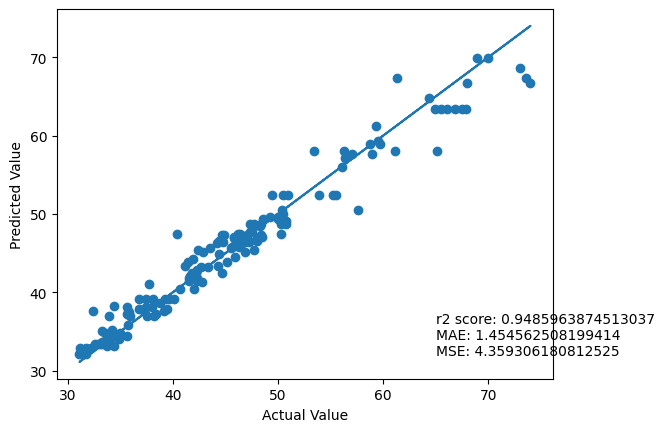

In [27]:
# Now, let's see the performance on our held out test set
rf_model = RandomForestRegressor(**grid_search.best_params_).fit(x_train,y_train)
print('training score: ',(r2_score(rf_model.predict(x_train),y_train)))
print('test score: ', r2_score(rf_model.predict(x_test),y_test))

#parity plot
plt.scatter(y_test, rf_model.predict(x_test))
plt.plot(y_test,y_test)
plt.text(65, 36, s ='r2 score: {}'.format(r2_score(rf_model.predict(x_test), y_test)))
plt.text(65, 34, s ='MAE: {}'.format(mean_absolute_error(rf_model.predict(x_test), y_test)))
plt.text(65, 32, s ='MSE: {}'.format(mean_squared_error(rf_model.predict(x_test), y_test)))
plt.xlabel('Actual Value')
_ = plt.ylabel('Predicted Value')

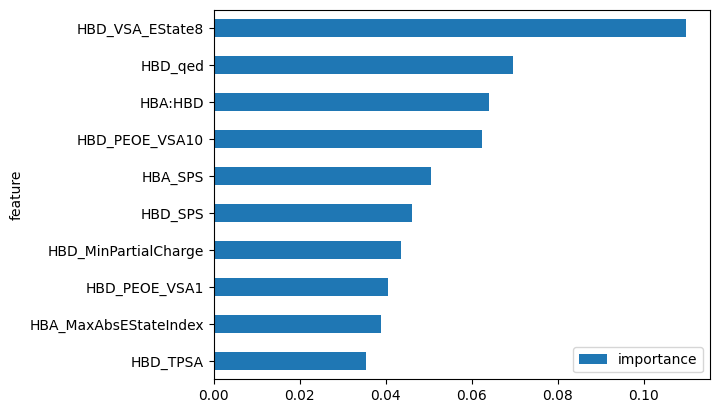

In [24]:
#Analizing most important features
df_ft_imp_rf = pd.DataFrame({'feature': x_train.columns,'importance': rf_model.feature_importances_}).sort_values('importance',ascending=True)
df_ft_imp_rf.tail(10).plot.barh('feature','importance')
plt.show()

# Some parting words
Some things to keep in mind about random forest methods
*   It's a fairly robust model, and usually doesn't overfit
*   As it's a tree based model, scaling of the data is not required
*   It's not good at extrapolation, see here: https://www.kaggle.com/code/carlmcbrideellis/extrapolation-do-not-stray-out-of-the-forest





